## Model Definition

In [9]:
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 9
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes = 2

def get_model():
    
    model = Sequential()
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    model.summary()
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [10]:
import pandas as pd
import numpy as np

concatenated_HO = pd.read_csv('concatenated_GSC-Features.csv')
subtracted_HO = pd.read_csv('subtracted_GSC-Features.csv')

X_concatenated_HO = concatenated_HO.iloc[:,2:20]
X_concatenated_HO = np.array(X_concatenated_HO.values)

Y_concatenated_HO = concatenated_HO.iloc[:,-1:]
Y_concatenated_HO = np.array(Y_concatenated_HO.values)
Y_concatenated_HO1 = to_categorical(Y_concatenated_HO)

X_subtracted_HO = subtracted_HO.iloc[:,2:11]
X_subtracted_HO = np.array(X_subtracted_HO.values)

Y_subtracted_HO = subtracted_HO.iloc[:,-1:]
Y_subtracted_HO = np.array(Y_subtracted_HO.values)
Y_subtracted_HO1 = to_categorical(Y_subtracted_HO)


# <font color='blue'>Creating Model</font>

In [11]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               5120      
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1026      
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 6,146
Trainable params: 6,146
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [12]:
validation_data_split = 0.2
num_epochs = 1000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')



history = model.fit(X_subtracted_HO 
                    , Y_subtracted_HO1
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 80000 samples, validate on 20000 samples
Epoch 1/1000
80000/80000 [==============================] - 1s 12us/step - loss: 0.6845 - acc: 0.5482 - val_loss: 0.6827 - val_acc: 0.5534
Epoch 2/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6827 - acc: 0.5515 - val_loss: 0.6810 - val_acc: 0.5522
Epoch 3/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6824 - acc: 0.5510 - val_loss: 0.6817 - val_acc: 0.5550
Epoch 4/1000
80000/80000 [==============================] - 1s 13us/step - loss: 0.6822 - acc: 0.5507 - val_loss: 0.6800 - val_acc: 0.5546
Epoch 5/1000
80000/80000 [==============================] - 1s 11us/step - loss: 0.6819 - acc: 0.5518 - val_loss: 0.6803 - val_acc: 0.5569
Epoch 6/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6819 - acc: 0.5520 - val_loss: 0.6800 - val_acc: 0.5536
Epoch 7/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6818 - acc: 0.5512 - val_loss: 0.

80000/80000 [==============================] - 1s 10us/step - loss: 0.6809 - acc: 0.5540 - val_loss: 0.6797 - val_acc: 0.5556
Epoch 60/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6807 - acc: 0.5540 - val_loss: 0.6810 - val_acc: 0.5550
Epoch 61/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6806 - acc: 0.5547 - val_loss: 0.6807 - val_acc: 0.5571
Epoch 62/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6806 - acc: 0.5535 - val_loss: 0.6804 - val_acc: 0.5560
Epoch 63/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6809 - acc: 0.5545 - val_loss: 0.6803 - val_acc: 0.5569
Epoch 64/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6807 - acc: 0.5540 - val_loss: 0.6805 - val_acc: 0.5547
Epoch 65/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6805 - acc: 0.5547 - val_loss: 0.6810 - val_acc: 0.5548
Epoch 66/1000
80000/80000 [========

80000/80000 [==============================] - 1s 10us/step - loss: 0.6815 - acc: 0.5544 - val_loss: 0.6819 - val_acc: 0.5567
Epoch 118/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6816 - acc: 0.5547 - val_loss: 0.6822 - val_acc: 0.5569
Epoch 119/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6813 - acc: 0.5542 - val_loss: 0.6813 - val_acc: 0.5562
Epoch 120/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6814 - acc: 0.5537 - val_loss: 0.6819 - val_acc: 0.5543
Epoch 121/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6811 - acc: 0.5545 - val_loss: 0.6816 - val_acc: 0.5528
Epoch 122/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6814 - acc: 0.5543 - val_loss: 0.6813 - val_acc: 0.5552
Epoch 123/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6810 - acc: 0.5544 - val_loss: 0.6821 - val_acc: 0.5562
Epoch 124/1000
80000/80000 [==

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb24fd2710>,
      dtype=object)

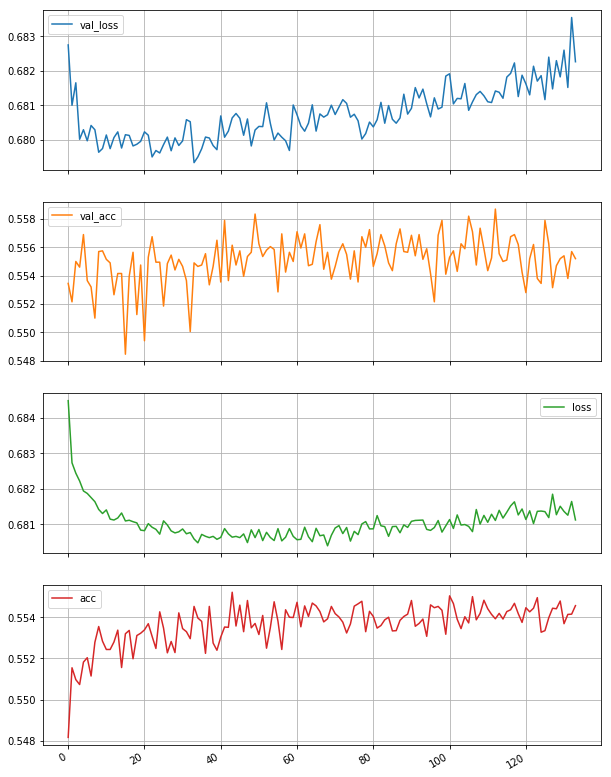

In [13]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))